# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Creamos función para leer archivos JSON corruptos:

In [2]:
# CREAMOS FUNCION PARA ARREGLAR JSON CORRUPTOS, YA QUE LOS DATASETS DE REVIEWS E ITEMS ESTABAN CORRUPTOS
def Read_corrupted_Json(path):
    """Permite leer json corruptos donde recibe el parametro de 'path' (dirección donde esta el archivo json) y debe ser de tipo str, se debe crear una variable para tomar los valores de esta función."""
    import pandas as pd
    import ast # Importamos la libreria 'ast' para trabajar con el dataset ya que encontramos problemas en la estructura del json, con su funcion literal_eval
    list = [] # Creamos una lista donde se van a guardar los datos del json arreglado con la libreria

    
    with open(path, 'r', encoding='UTF-8') as corrupt_file: # Abrimos con 'Open' el archivo json, que al estar corrupto pandas no puede leerlo
        for row in corrupt_file:  # Hacer una iterancia de cada registro del json
            try:                            
                fixed_file = ast.literal_eval(row) # Crea variable con la fila arreglada con la funcion literal-eval de ast                                                      
                list.append(fixed_file) # ast.literal_eval convierte la fila en diccionario, para poder transformarlo en dataframe
            except ValueError:
                print(f"Error en la línea: {row}") # En caso de error nos dice la fila con el error con un  mensaje de 'ValueError'
                continue

    dataframe = pd.DataFrame(list) #Creamos un DataFrame a partir de la lista de diccionarios del json arreglado
    return dataframe # Devolvemos el dato del dataframe para aplicarle a una variable para que sea el dataframe

## Leemos los 3 dataset:

In [3]:
# Leemos steam_games
steam_games = pd.read_json("../Datasets/steam_games.json",lines=True, convert_dates=True )  


In [4]:
# Leemos user_reviews
path_reviews = '../Datasets/user_reviews.json' 
user_reviews = Read_corrupted_Json(path_reviews) 

In [5]:
# Leemos user_items
path_items2 = "../Datasets/users_items.json"
user_items = Read_corrupted_Json(path_items2)

------------------------
## EDA  steam_games:


Vemos un primer viztazo a los datos, las primeras y ultimas filas:

In [6]:
#Primeras 5 filas:
steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [7]:
#Ultimas 5 filas:
steam_games.tail()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"
120444,None,None,Maze Run VR,None,http://store.steampowered.com/app/681550/Maze_...,None,"[Early Access, Adventure, Indie, Action, Simul...",http://steamcommunity.com/app/681550/reviews/?...,"[Single-player, Stats, Steam Leaderboards, HTC...",4.99,1.0,681550.0,None


Notamos todas las primeras filas son nulas. Vemos la cantidad de filas nulas que hay:

In [8]:
#Cantidad de filas nulas
filas_con_nulos = steam_games[steam_games.isnull().all(axis=1)]
print(f" La cantidad de filas nulas son: {len(filas_con_nulos)}")

 La cantidad de filas nulas son: 88310


Con respecto a las filas que no son nulas notamos que las columnas 'tags' y 'genres' tienen valores parecidos, ademas ambas columnas estan anidadas, por lo que se debería desanidar:

In [9]:
steam_games[["tags","genres"]].tail()

,tags,genres
120440,"[Strategy, Indie, Casual, Simulation]","[Casual, Indie, Simulation, Strategy]"
120441,"[Strategy, Indie, Casual]","[Casual, Indie, Strategy]"
120442,"[Indie, Simulation, Racing]","[Indie, Racing, Simulation]"
120443,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...","[Casual, Indie]"
120444,"[Early Access, Adventure, Indie, Action, Simul...",None


De la columna "release_date" viene la fecha completa y para el proyecto solo necesito el año. El cual se debera sacar solo el año:

In [10]:
steam_games.release_date.tail() 

120440    2018-01-04
120441    2018-01-04
120442    2018-01-04
120443    2017-09-02
120444          None
Name: release_date, dtype: object

También notamos que de la columna 'price' hay precios que deberian ser 0 y estan en palabras como Free to play, Free, Free to use, entre otros mas por ende este un str y deberiamos convertirlos en float una vez corregidos: 

In [11]:
steam_games.price.value_counts().tail(25)

price
139.92           1
0.5              1
0.89             1
6.66             1
13.98            1
10.49            1
179.0            1
131.4            1
4.68             1
16.06            1
Install Theme    1
6.0              1
3.39             1
27.49            1
995.0            1
61.99            1
71.7             1
38.85            1
320.0            1
40.0             1
74.76            1
32.99            1
14.95            1
26.99            1
Free to Use      1
Name: count, dtype: int64

Arreglamos la columna 'price' para poder guardar el dataset:

In [12]:
# Creamos la función para transformalo
def transformar_precio(cadena_caracteres):
    lista_palabra_gratis = ['Free', 'Play Now', 'Demo', 'Install Now', 'Third-party']
    if cadena_caracteres is None:
        return None
    elif isinstance(cadena_caracteres, str):
        for palabra in lista_palabra_gratis:
            if palabra in cadena_caracteres:
                return '0.00'
    return str(cadena_caracteres)

# La aplicamos en cada fila
steam_games['price'] = steam_games['price'].apply(transformar_precio)

Vemos también el top 10 de las desarrolladoras que mas juegos relizaron de la columna 'developer':

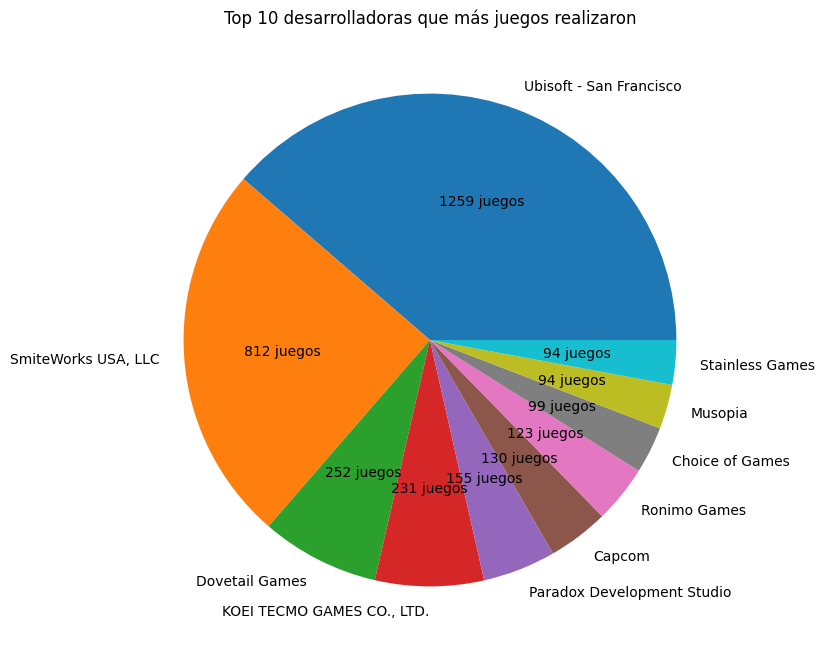

In [13]:
# Calcular la cantidad de datos por desarrollador
cantidad_juegos_por_desarrollador = steam_games['developer'].value_counts()

# Nos quedamos con los 6 que mas juegos realizaron
top_desarrolladores = cantidad_juegos_por_desarrollador.head(10)

# Graficamos
plt.figure(figsize=(8, 8))
plt.pie(top_desarrolladores, labels=top_desarrolladores.index, autopct=lambda p: f'{int(p*sum(top_desarrolladores)/100)} juegos')
plt.title('Top 10 desarrolladoras que más juegos realizaron')
plt.show()


Ahora vemos los tipos de datos de las columnas y los valores nulos que hay en las columnas:

In [14]:
steam_games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 12.9+ MB


Notamos la cantidad de filas y columnas en total:

In [15]:
# Cantidad total filas y columnas
print(f'La cantidad total de filas son: {steam_games.shape[0]}, y de columnas son: {steam_games.shape[1]}')

La cantidad total de filas son: 120445, y de columnas son: 13


Del total de columnas solo necesitariamos para este proyecto las siguientes: "id","app_name","genres","release_date","price" y "developer". De estas columnas necesarias notamos que tienen los siguentes nulos:

In [16]:
print(f"Los valores nulos de la columna 'id' son:", len(steam_games["id"][steam_games["id"].isnull()==True]))

print(f"Los valores nulos de la columna 'app_name' son:", len(steam_games["app_name"][steam_games["app_name"].isnull()==True]))

print(f"Los valores nulos de la columna 'genres' son:", len(steam_games["genres"][steam_games["genres"].isnull()==True]))

print(f"Los valores nulos de la columna 'release_date' son:", len(steam_games["release_date"][steam_games["release_date"].isnull()==True]))

print(f"Los valores nulos de la columna 'price' son:", len(steam_games["price"][steam_games["price"].isnull()==True]))

print(f"Los valores nulos de la columna 'developer' son:", len(steam_games["developer"][steam_games["developer"].isnull()==True]))

Los valores nulos de la columna 'id' son: 88312
Los valores nulos de la columna 'app_name' son: 88312
Los valores nulos de la columna 'genres' son: 91593
Los valores nulos de la columna 'release_date' son: 90377
Los valores nulos de la columna 'price' son: 89687
Los valores nulos de la columna 'developer' son: 91609


Vemos graficamente el porcentaje de nulos por columnas:

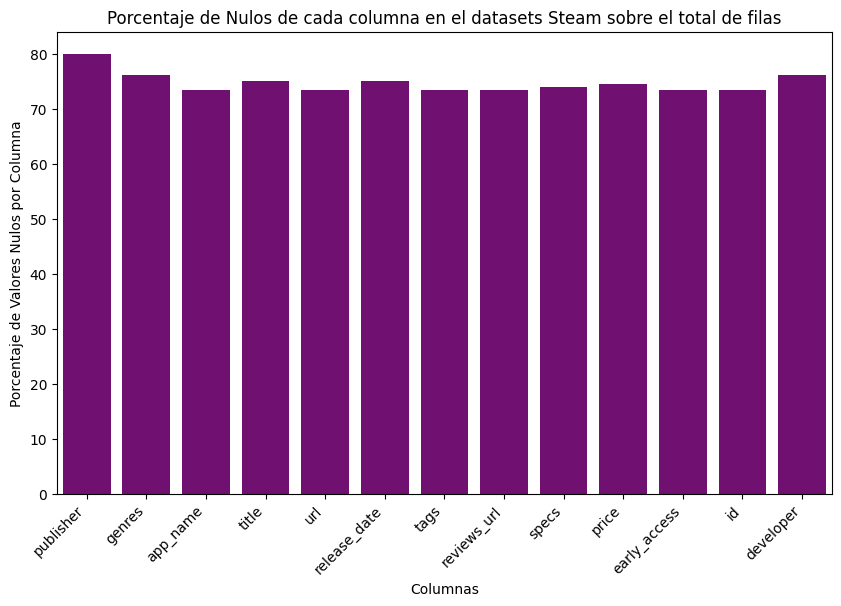

In [17]:
# Calcular la cantidad de valores nulos en cada columna de steam
nulos_por_columna = steam_games.isnull().sum()

# Calcular el total de filas de steam
total_filas = len(steam_games)

# Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna / total_filas * 100, color='Purple')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Nulos por Columna')
plt.title('Porcentaje de Nulos de cada columna en el datasets Steam sobre el total de filas')
plt.xticks(rotation=45, ha='right')
plt.show()


Vemos que todas las columnas tienen un elevado nuemro de nulos. Ahora revisamos el tipo de dato de cada columna:

In [18]:
print(f"El tipo de dato de la columna 'id' es:", steam_games["id"].dtype)

print(f"El tipo de dato de la columna 'app_name' es:", steam_games["app_name"].dtype)

print(f"El tipo de dato de la columna 'genres' es:", steam_games["genres"].dtype)

print(f"El tipo de dato de la columna 'release_date' es:", steam_games["release_date"].dtype)

print(f"El tipo de dato de la columna 'price' es:", steam_games["price"].dtype)

print(f"El tipo de dato de la columna 'developer' es:", steam_games["developer"].dtype)

El tipo de dato de la columna 'id' es: float64
El tipo de dato de la columna 'app_name' es: object
El tipo de dato de la columna 'genres' es: object
El tipo de dato de la columna 'release_date' es: object
El tipo de dato de la columna 'price' es: object
El tipo de dato de la columna 'developer' es: object


Vemos la cantidad de filas duplicadas que hay en las columnas que vamos a usar sin tener en cuenta 'genres' que es lista:

In [19]:
duplicados = steam_games[["id","app_name","release_date","price","developer"]].duplicated().sum()

print("Cantidad de filas duplicadas:", duplicados)



Cantidad de filas duplicadas: 88310


--------------------------------------
## EDA: user_reviews


Vemos un primer vitazo de las primeras filas y las ultimas:

In [20]:
#Primeras filas
user_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [21]:
user_reviews.tail()

,user_id,user_url,reviews
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"[{'funny': '1 person found this review funny',..."


Notamos que la columna 'reviews' esta anidada y que tiene informacion importante siendo estas una lista de diccionarios:

In [22]:
user_reviews.loc[0,'reviews']

[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

De esta columna anidada los valores que necesitaremos para el proyecto son items_count" e "items". Ahora vemos la información general de los datos:

In [23]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


No vemos nulos en las filas de acuerdo a la informacón general. La cantidad de filas y columnasque hay son:

In [24]:
print(f'La cantidad de filas son: {user_reviews.shape[0]} y de columnas son: {user_reviews.shape[1]}')

La cantidad de filas son: 25799 y de columnas son: 3


Los tipos de datos de cada columna son:

In [25]:
print(f"El tipo de dato de la columna 'user_id' es:", user_reviews["user_id"].dtype)

print(f"El tipo de dato de la columna 'user_url' es:", user_reviews["user_url"].dtype)

print(f"El tipo de dato de la columna 'reviews' es:", user_reviews["reviews"].dtype)

El tipo de dato de la columna 'user_id' es: object
El tipo de dato de la columna 'user_url' es: object
El tipo de dato de la columna 'reviews' es: object


Notamos que en este caso solo necesitariamos las columnas: "user_id" y "reviews" para trabajar y descartar "user_url". La columna 'user_id' permite conectar con la columna "id" del dataset **steam_games**. Vemos la cantidad de filas duplicadas que hay:

In [26]:
#Filas duplicadas sin tener en cuenta la columna reviews que es una lista de diccionarios.
user_reviews[['user_id','user_url']].duplicated().sum()

314

------------------------
## EDA: user_items

Vemos un primer viztazo general primeras y ultimas filas:

In [27]:
user_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [28]:
user_items.tail()

,user_id,items_count,steam_id,user_url,items
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."
88309,edward_tremethick,0,76561198331598578,http://steamcommunity.com/id/edward_tremethick,[]


Notamos la columna items como lista de diccionarios con datos imposrantes como 'item_id' para conectar con los otras datasets:

In [29]:
user_items.loc[0,'items']

[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 6,
  'playtime_2weeks': 0},
 {'item_id': '20',
  'item_name': 'Team Fortress Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '30',
  'item_name': 'Day of Defeat',
  'playtime_forever': 7,
  'playtime_2weeks': 0},
 {'item_id': '40',
  'item_name': 'Deathmatch Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '50',
  'item_name': 'Half-Life: Opposing Force',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '60',
  'item_name': 'Ricochet',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '70',
  'item_name': 'Half-Life',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '130',
  'item_name': 'Half-Life: Blue Shift',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '300',
  'item_name': 'Day of Defeat: Source',
  'playtime_forever': 4733,
  'playtime_2weeks': 0},
 {'item_id': '240',
  'item_name': 'Counter-Strike: S

Vemos la cantidad de filas y columnas:

In [30]:
print(f"La cantidad de filas son: {user_items.shape[0]} y columnas son: {user_items.shape[1]}")

La cantidad de filas son: 88310 y columnas son: 5


Vemos información general con los tipos de datos de la columnas: 

In [31]:
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


No notamos valores nulos, vemos la informacion descriptiva de los valores de la columna 'items_count':

In [32]:
user_items['items_count'].describe()

count    88310.000000
mean        58.353629
std        122.312095
min          0.000000
25%          3.000000
50%         26.000000
75%         73.000000
max       7762.000000
Name: items_count, dtype: float64

In [33]:
print(f'El promedio de cantidad de items es {user_items['items_count'].mean()}')

print(f'El maximo de cantidad de items es {user_items['items_count'].max()}')

print(f'El minimo de cantidad de items es {user_items['items_count'].min()}')

El promedio de cantidad de items es 58.353629260559394
El maximo de cantidad de items es 7762
El minimo de cantidad de items es 0


Notamos el maximo muy elevado que puede ser un outliers, vemos su distribución graficamente:

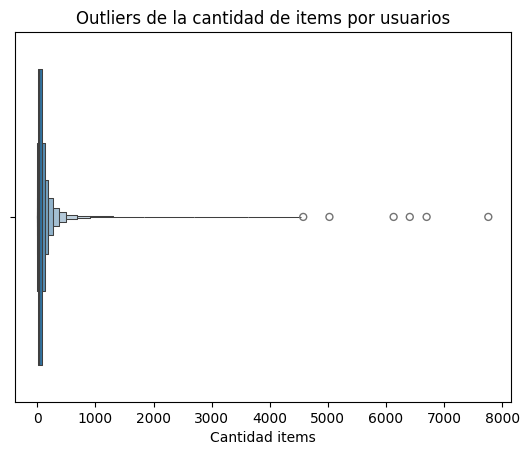

In [34]:

sns.boxenplot(x=user_items['items_count'])
plt.xlabel('Cantidad items')
plt.title('Outliers de la cantidad de items por usuarios')
plt.show()

La mayoria de los valores se encuentran por debajo de los 1000 items. Usamos la regla de los 3 sigmas para entontrar la cantidad de valores outliers muy extremos:

In [35]:
# Regla de los 3 sigmas:

cantidad_items_promedio = user_items['items_count'].mean()
deviacion_estandar_cantidad_items = user_items['items_count'].std()
limite_superior = cantidad_items_promedio + 3 * deviacion_estandar_cantidad_items
limite_inferior = cantidad_items_promedio - 3 * deviacion_estandar_cantidad_items

cantidad_outliers = len(user_items['items_count'][(user_items['items_count'] > limite_superior) | (user_items['items_count'] < limite_inferior)])

print(f"Los conciderados outliers extremos segun la regla de las 3 sigma son: {cantidad_outliers}")

Los conciderados outliers extremos segun la regla de las 3 sigma son: 933


Estos valores outliers extremos sacaremos para tener un dataset field a la realidad. Ahora vemos los valores duplicados sin tener en cuenta la columna anidada 'items':

In [36]:
duplicados_user_items = user_items[['user_id', 'items_count', 'steam_id', 'user_url']].duplicated().sum()
print(f"La cantidad de duplicados sin desanidar son: {duplicados_user_items}")

La cantidad de duplicados sin desanidar son: 684


----------------------------------------------
## Guardamos los datasets arreglados

In [37]:
steam_games.to_parquet('../Datasets/steam_games_arreglado.parquet', compression='gzip', index=False)

In [38]:
user_reviews.to_parquet('../Datasets/user_reviews_arreglado.parquet', compression='gzip', index=False)

In [39]:
user_items.to_parquet('../Datasets/user_items_arreglado.parquet', compression='gzip', index=False)